In [38]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_community.tools import DuckDuckGoSearchResults
from langgraph.graph.message import add_messages

from config import geminiKey

## Graph State

In [39]:
class ChatState(TypedDict):
    messages: Annotated[list, add_messages]

In [40]:
chat = ChatGoogleGenerativeAI(api_key=geminiKey, model="gemini-1.5-flash")

# LangGraph basic chatbot

In [ ]:
def chatbot(state: ChatState):
    # print("="*50)
    # print(state)
    # print("="*50)
    return {"messages": [chat.invoke(state["messages"])]}

In [42]:
graph_builder = StateGraph(ChatState)

# Add node
graph_builder.add_node("llm", chatbot)

# Add edges
graph_builder.add_edge(START, "llm")
graph_builder.add_edge("llm", END)

# compile graph
agent = graph_builder.compile()

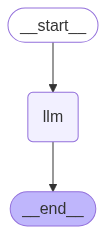

In [43]:
# Visualize Graph
from IPython.display import display, Image

def visualizeGraph(graph):
    try:
        display(Image(graph.get_graph().draw_mermaid_png()))
    except Exception:
        print("Cannot draw graph")

visualizeGraph(agent)

In [ ]:
res = agent.invoke({"messages": ["Hi"]})
res["messages"][-1].content

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='326a2e08-19c2-4152-8280-282989426195')]}


'Hi there! How can I help you today?'